# Just In Time Trajectory

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from trajectory.planner import * 
from trajectory.plot import * 
import matplotlib.pyplot as plt
from IPython.display import display
import trajectory as tj
import pandas as pd
import numpy as np
from math import sqrt

[[0        250↗   750@5000  ↘0       5000]]
[[5000       0↗  1000@5000  ↘0       5000]]
[[5000       0↗  2000@5000  ↘0       5000]]
[[5000       0↗   500@5000  ↘0       5000]]
[[5000       0↗  1000@5000  ↘0       5000]]


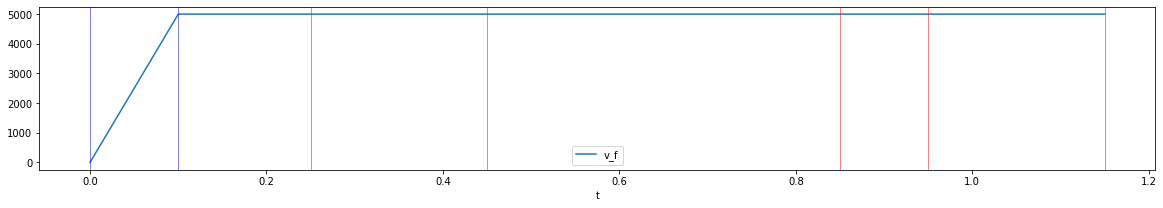

In [2]:

sl = SegmentList([Joint(5_000, 50_000)])

x = 1000

sl.rmove([x])
sl.rmove([x])
sl.rmove([2*x])
sl.rmove([x/2])
sl.rmove([x])

for e in sl.segments:
    e.update()

    print(e.joint_segments)

    pass
  
plot_segment_list(sl.dataframe)

1.0500|[0        250↗  4750@5000  ↘0       5000] [0        250↗  4750@5000  ↘0       5000]
1.0000|[5000     249↗   251@276   ↘0        276] [5000       0↗  5000@5000  ↘0       5000]
1.0446|[276      249↗  4751@5000  ↘0       5000] [5000      20↗  4979@4786  ↘0       4786]


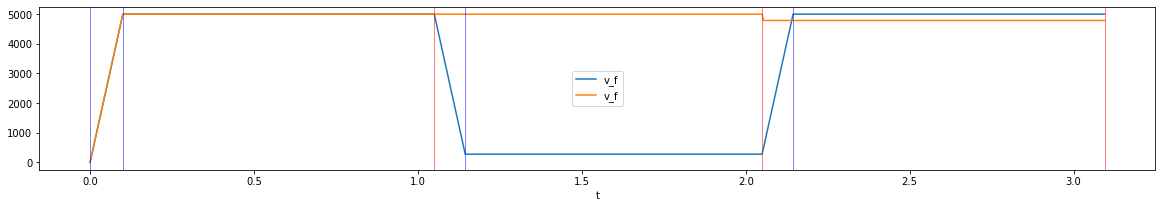

In [3]:
sl = SegmentList([Joint(5_000, 50_000),Joint(5_000, 50_000)])

x = 5000

sl.rmove([x,x])
sl.rmove([x/10,x])
sl.rmove([x,x])

sl.update()

print(sl)
    
plot_segment_list(sl.dataframe)



1.1001|[0        250↗  4500@5000  ↘250        0] [0        225↗  4774@4749  ↘0       4749]
1.0001|[0          0↗     0@0     ↘0          0] [4749      24↗  4976@5000  ↘0       5000]
1.0500|[0        250↗  4750@5000  ↘0       5000] [5000      23↗  4977@4761  ↘0       4761]


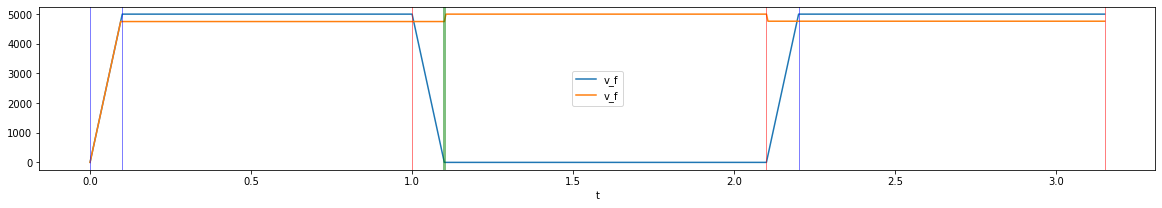

In [4]:
sl = SegmentList([Joint(5_000, 50_000),Joint(5_000, 50_000)])

x = 5000

sl.rmove([x,x])
sl.rmove([0,x])
sl.rmove([x,x])

sl.update()

print(sl)
    
plot_segment_list(sl.dataframe)



1.1001|[0        250↗  4500@5000  ↘250        0] [0        225↗  4774@4749  ↘0       4749]
1.1003|[0       -250↗ -4500@5000  ↘-250       0] [4749      19↗  4981@4543  ↘0       4543]
1.0501|[0        250↗  4750@5000  ↘0       5000] [4543      20↗  4980@4761  ↘0       4761]


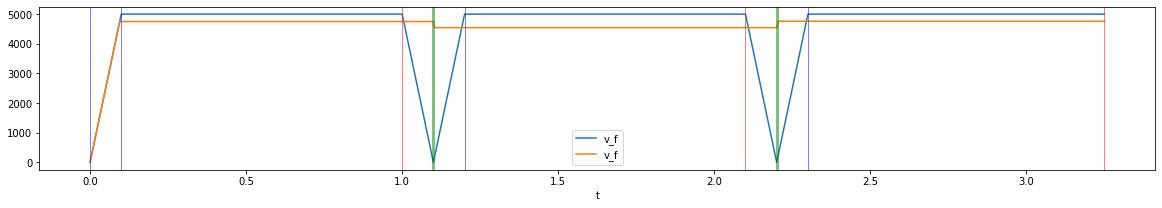

In [5]:
sl = SegmentList([Joint(5_000, 50_000),Joint(5_000, 50_000)])

x = 5000

sl.rmove([x,x])
sl.rmove([-x,x])
sl.rmove([x,x])

sl.update()

print(sl)
    
plot_segment_list(sl.dataframe)



2.2332|[0        472↗  4055@2943  ↘472        0] [0        387↗  4612@2412  ↘0       2412]
2.2139|[0       -484↗ -4031@2972  ↘-484       0] [2412      48↗  4952@2257  ↘0       2257]
2.2339|[0        472↗  4056@2939  ↘472        0] [2257      47↗  4565@2412  ↘387        0]
[0, 0]


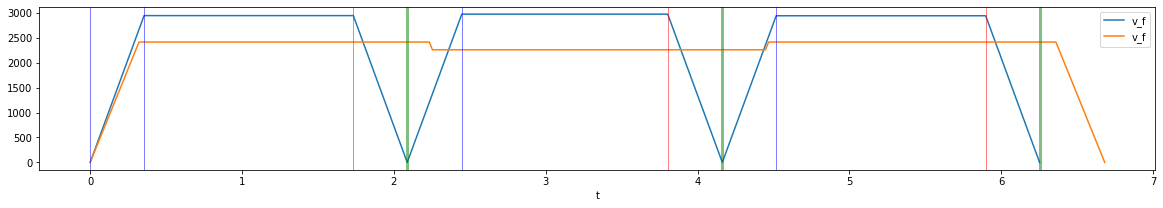

In [25]:
# a = 7550 passes, 7499 does not. 
sl = SegmentList([Joint(5_000, 7_499),Joint(5_000, 7_499)])

x = 5000

sl.rmove([x,x])
sl.rmove([-x,x])
sl.rmove([x,x])

sl.update()
sl.update()
sl.update()

print(sl)
    
print([js.v_1_max for js in sl.segments[-1].joint_segments])
    
plot_segment_list(sl.dataframe)



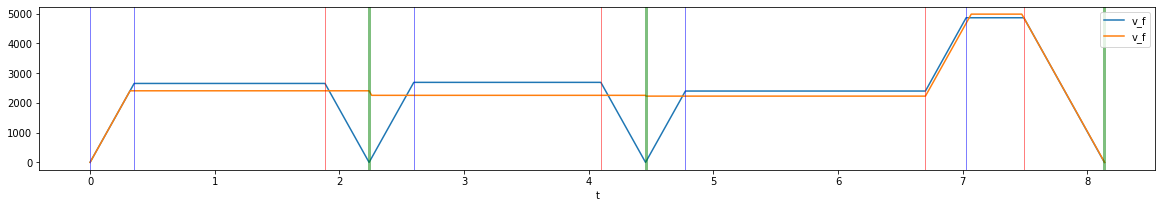

In [26]:
sl.rmove([x,x])
sl.update()
sl.update() 
sl.update()
plot_segment_list(sl.dataframe)



In [ ]:
sl = SegmentList([Joint(5_000, 50_000),Joint(5_000, 50_000)])

x = 2000

sl.rmove([x, x])
sl.rmove([x,x/2])
sl.rmove([x,2*x])
sl.rmove([x,x])

for e in sl.segments:
    e.update()

print(sl)
plot_segment_list(sl.dataframe)
sl.dataframe_stacked

In [ ]:
sl = SegmentList([Joint(5_000, 50_000),Joint(5_000, 50_000)])

x = 3000

sl.rmove([x, x])
sl.rmove([x,x/2])
sl.rmove([x,2*x])
sl.rmove([x,x])
sl.rmove([x,x])

sl.update()

print(sl)
plot_segment_list(sl.dataframe)
sl.dataframe_stacked

In [ ]:
sl = SegmentList([Joint(5_000, 50_000),Joint(5_000, 50_000)])

x = 3000

sl.rmove([x, x])
sl.rmove([x/2, x])
sl.rmove([x, x])

sl.update()

print(sl)
plot_segment_list(sl.dataframe)
sl.dataframe_stacked

In [ ]:
sl = SegmentList([Joint(5_000, 50_000),Joint(5_000, 50_000)])

x = 5000

sl.rmove([x, x])
sl.rmove([0, x])
sl.rmove([x, x])
sl.rmove([-x, x])
sl.rmove([x, x])

sl.update()

print(sl)
plot_segment_list(sl.dataframe)
sl.dataframe_stacked

In [ ]:
def max_v_0(x, a):
    """Return the maximum v_0 for a segment of distance x such that  we can
    decelerate and not exceede distance x"""

    # decel time t = v0/a
    # x = (v_i+v_f)/2 * t -> v0/2 * t
    # x = v0/2 * v0/a
    # x = v0^2/2a
    return sqrt(2 * a * x)

max_v_0(100,50_000)